### Detecting Credit Card Approval
**Goal/ Question:** 
Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk. The goal of this project is to predict the likelihood of an applicant getting credit card approval.

**Data Problem:** The data task is to train and tune data to be identify key dimensions that help build a highly accurate model that predicts the credit score and hence credit card approval rate. This will enable the credit companies to identify the risky applicants from non-risky applicants.

**Data**

The data is sourced from Kaggle.


Link: 
https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction/data?select=application_record.csv
https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction/data?select=credit_record.csv


### Understanding the Data

#### Import and Setup

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from scipy.stats import randint

from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import LabelEncoder, LabelBinarizer, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.ensemble import VotingClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


from joblib import parallel_backend


from sklearn.decomposition import PCA

from warnings import filterwarnings 

from datetime import datetime
import time

from sklearn.dummy import DummyClassifier

from sklearn.inspection import permutation_importance



In [3]:
from IPython.core.display import HTML
table_css = 'table {align:left;display:block} '
HTML('<style>{}</style>'.format(table_css))

In [4]:
df_application = pd.read_csv('data/application_record.csv')

In [5]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
df_application.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [7]:
df_application.shape

(438557, 18)

In [8]:
df_credit = pd.read_csv('data/credit_record.csv')

In [9]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [10]:
df_credit.shape

(1048575, 3)

In [11]:
df_credit.head(5)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [12]:
df = pd.merge(df_application, df_credit, on='ID', how='inner')

### Understanding the Features and Target variable
#### Checking data type of features and looking for null values

| Feature name | Explanation Remarks |
| ----------- | ----------- |
| ID      | Client number       |
| CODE_GENDER   | Gender        |
| FLAG_OWN_CAR       | Is there a car       |
| FLAG_OWN_REALTY    | Is there a property  |
| CNT_CHILDREN       | Number of children   |
| AMT_INCOME_TOTAL   | Annual income        |
| AME_INCOME_TYPE    | Income category      |
| NAME_EDUCATION_TYPE| Education level      |
| NAME_FAMILY_STATUS | Marital status       |
| NAME_HOUSING_TYPE  | Way of living        |
| FLAG_MOBIL         | Is there a mobile phone |
| FLAG_WORK_PHONE    | Is there a work phone   |
| FLAG_PHONE         | Is there a phone        |
| FLAG_EMAIL         | Is there an email       |
|DAYS_BIRTH          |Birthday	Count backwards from current day (0), -1 means yesterday|
|DAYS_EMPLOYED |Start date of employment	Count backwards from current day(0). If positive, it means the person currently unemployed.|
|OCCUPATION_TYPE | Occupation	|
|CNT_FAM_MEMBERS  |	Family size |

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [14]:
print(df.isnull().sum().sort_values())
print()
print('Shape: ',df.shape)

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
OCCUPATION_TYPE        240048
dtype: int64

Shape:  (777715, 20)


In [15]:
columns_with_null = df.columns[df.isnull().any()].tolist()


# Identify columns where 'unknown' is present
columns_with_unknown = [col for col in df.columns if df[col].astype(str).eq('unknown').any()]

print("Rows with null values:",columns_with_null)
print()
print("Rows with unknown values:",columns_with_unknown)
print()
non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()
print("Rows with non-numeric values:",non_numeric_columns)

Rows with null values: ['OCCUPATION_TYPE']

Rows with unknown values: []

Rows with non-numeric values: ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'STATUS']


### There are null values but no unknown values

In [16]:
columns_to_drop = ['ID','OCCUPATION_TYPE']

# Drop the columns in one shot
df.drop(columns=columns_to_drop, inplace=True)

In [17]:
df = df.dropna()
df.shape

(777715, 18)

In [18]:
df['CODE_GENDER'].unique()
print("Value Counts:",df['CODE_GENDER'].value_counts())

df['FLAG_MOBIL'].unique()
print("Value Counts:",df['FLAG_MOBIL'].value_counts())

df['FLAG_OWN_CAR'].unique()
print("Value Counts:",df['FLAG_OWN_REALTY'].value_counts())

df['CNT_CHILDREN'].unique()
print("Value Counts:",df['CNT_CHILDREN'].value_counts())

Value Counts: CODE_GENDER
F    518851
M    258864
Name: count, dtype: int64
Value Counts: FLAG_MOBIL
1    777715
Name: count, dtype: int64
Value Counts: FLAG_OWN_REALTY
Y    512948
N    264767
Name: count, dtype: int64
Value Counts: CNT_CHILDREN
0     540639
1     155638
2      70399
3       9328
4       1224
5        324
14       111
7         46
19         6
Name: count, dtype: int64


In [19]:
children = {
    (0, 1): 'No Children',
    (1, 40): 'Have Children'
}

# Function to map age to age range
def map_to_range(num):
    for range_, range_label in children.items():
        if range_[0] <= num < range_[1]:
            return range_label

# Apply the function to map age to age range
df['CHILDREN'] = df['CNT_CHILDREN'].apply(map_to_range)

#columns_to_drop = ['CNT_CHILDREN']

# Drop the columns in one shot
#df.drop(columns=columns_to_drop, inplace=True)

df['CHILDREN'].unique()
print("Value Counts:",df['CHILDREN'].value_counts())

df['AMT_INCOME_TOTAL'].unique()
print("Min:",df['AMT_INCOME_TOTAL'].min())
print("Max:",df['AMT_INCOME_TOTAL'].max())

income = {
    (20000, 100000): '<100K',
    (100000, 150000): '100K - 150K',    
    (150000, 200000): '150K - 200K',
    (200000, 250000): '200K - 250K',
    (250000, 300000): '250K - 300K',
    (300000, 2000000): '>300K'
}

# Function to map age to age range
def map_to_range(num):
    for range_, range_label in income.items():
        if range_[0] <= num < range_[1]:
            return range_label

# Apply the function to map age to age range
df['income_range'] = df['AMT_INCOME_TOTAL'].apply(map_to_range)

#columns_to_drop = ['AMT_INCOME_TOTAL']

# Drop the columns in one shot
#df.drop(columns=columns_to_drop, inplace=True)

df['MONTHS_BALANCE'].unique()
print("Min:",df['MONTHS_BALANCE'].min())
print("Max:",df['MONTHS_BALANCE'].max())

income = {
    (-70, -50): '>50 months',
    (-50, -40): '40-50 months',    
    (-40, -30): '30-40 months',
    (-30, -20): '20-30 months',
    (-20, -10): '10-20 months',
    (-10, -8): '8-10 months',
    (-8, -7): '8 months',
    (-7, -6): '7 months',        
    (-6, -5): '6 months',    
    (-5, -4): '5 months',
    (-4, -3): '4 months',
    (-3, -2): '3 months',
    (-2, -1): '2 months',
    (-1, 0): '1 month',
    (0, 1): '0 months'
}

# Function to map age to age range
def map_to_range(num):
    for range_, range_label in income.items():
        if range_[0] <= num < range_[1]:
            return range_label

# Apply the function to map age to age range
df['month_balance_range'] = df['MONTHS_BALANCE'].apply(map_to_range)
print(df['month_balance_range'].value_counts())


columns_to_drop = ['MONTHS_BALANCE']
# Drop the columns in one shot
df.drop(columns=columns_to_drop, inplace=True)

df['CNT_FAM_MEMBERS'].unique()
print("Value Counts:",df['CNT_FAM_MEMBERS'].value_counts())

family = {
    (1, 2): '1',
    (2, 3): '2',    
    (3, 30): '3 Plus'
}

# Function to map age to age range
def map_to_range(num):
    for range_, range_label in family.items():
        if range_[0] <= num < range_[1]:
            return range_label

# Apply the function to map age to age range
df['FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].apply(map_to_range)

#columns_to_drop = ['CNT_FAM_MEMBERS']

# Drop the columns in one shot
#df.drop(columns=columns_to_drop, inplace=True)

print()
print(df['FAM_MEMBERS'].value_counts())


# C: paid off that month 
# X: No loan for the month
# 0: 1-29 days past due 
# 1: 30-59 days past due 
# 2: 60-89 days overdue 
# 3: 90-119 days overdue 
# 4: 120-149 days overdue 
# 5: Overdue or bad debts, write-offs for more than 150 days 

df['loan_status'] = df['STATUS'].map({'0': 'first_month_due' , '1': '2nd_month_due', '2' : '3rd_month_overdue',  '3': '4th_month_overdue',
                                '4' : '5th_month_overdue', '5' : 'bad_debt' , 'C': 'good' , 'X' : 'no_loan'})

df.loc[df["STATUS"]=="C","STATUS"] = "Good_Debt"
df.loc[df["STATUS"]== "X","STATUS"] = "Good_Debt"
df.loc[df["STATUS"]=="0" ,"STATUS"] = "Good_Debt"
df.loc[df["STATUS"]=="1","STATUS"] = "Bad_Debt"
df.loc[df["STATUS"]== "2","STATUS"] = "Bad_Debt"
df.loc[df["STATUS"]=="3" ,"STATUS"] = "Bad_Debt"
df.loc[df["STATUS"]== "4","STATUS"] = "Bad_Debt"
df.loc[df["STATUS"]=="5" ,"STATUS"] = "Bad_Debt"
#df['STATUS'].replace("C" , "Good_Debt" , inplace = True)
#df['STATUS'].replace("X" , "Good_Debt" , inplace = True)
#df['STATUS'].replace("0" , "Good_Debt" , inplace = True)
#df['STATUS'].replace("1" , "Bad_Debt" , inplace = True)
#df['STATUS'].replace("2" , "Bad_Debt" , inplace = True)
#df['STATUS'].replace("3" , "Bad_Debt" , inplace = True)
#df['STATUS'].replace("4" , "Bad_Debt" , inplace = True)
#df['STATUS'].replace("5" , "Bad_Debt" , inplace = True)

print()
print("Value Counts:",df['STATUS'].value_counts())


Value Counts: CHILDREN
No Children      540639
Have Children    237076
Name: count, dtype: int64
Min: 27000.0
Max: 1575000.0
Min: -60
Max: 0
month_balance_range
10-20 months    192903
20-30 months    147168
30-40 months    102143
40-50 months     57199
8-10 months      43815
1 month          24963
2 months         24871
0 months         24672
3 months         24644
4 months         24274
5 months         23899
6 months         23473
7 months         23018
8 months         22494
>50 months       18179
Name: count, dtype: int64
Value Counts: CNT_FAM_MEMBERS
2.0     423723
1.0     141477
3.0     134894
4.0      66990
5.0       8999
6.0       1196
7.0        273
15.0       111
9.0         46
20.0         6
Name: count, dtype: int64

FAM_MEMBERS
2         423723
3 Plus    212515
1         141477
Name: count, dtype: int64

Value Counts: STATUS
Good_Debt    766140
Bad_Debt      11575
Name: count, dtype: int64


In [20]:
df['DAYS_BIRTH'] = datetime.strptime("2024-01-01", "%Y-%m-%d") + df['DAYS_BIRTH'].apply(pd.offsets.Day)
df['DAYS_BIRTH'] = pd.to_datetime(df['DAYS_BIRTH'])
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].dt.year
current_year = datetime.now().year
df['AGE'] = current_year - df['DAYS_BIRTH']
df.drop(columns='DAYS_BIRTH', inplace=True)

In [21]:
def convert_to_working_years(days_employed):
    if days_employed < 0:
        return -1 * (days_employed // 365)
    else:
        return 0

# Apply the function to the DAYS_EMPLOYED column
df['WORKING_YEARS'] = df['DAYS_EMPLOYED'].apply(convert_to_working_years)


df.drop(columns='DAYS_EMPLOYED', inplace=True)

In [22]:
df.shape

(777715, 22)

## Visualizing Features and Target variable

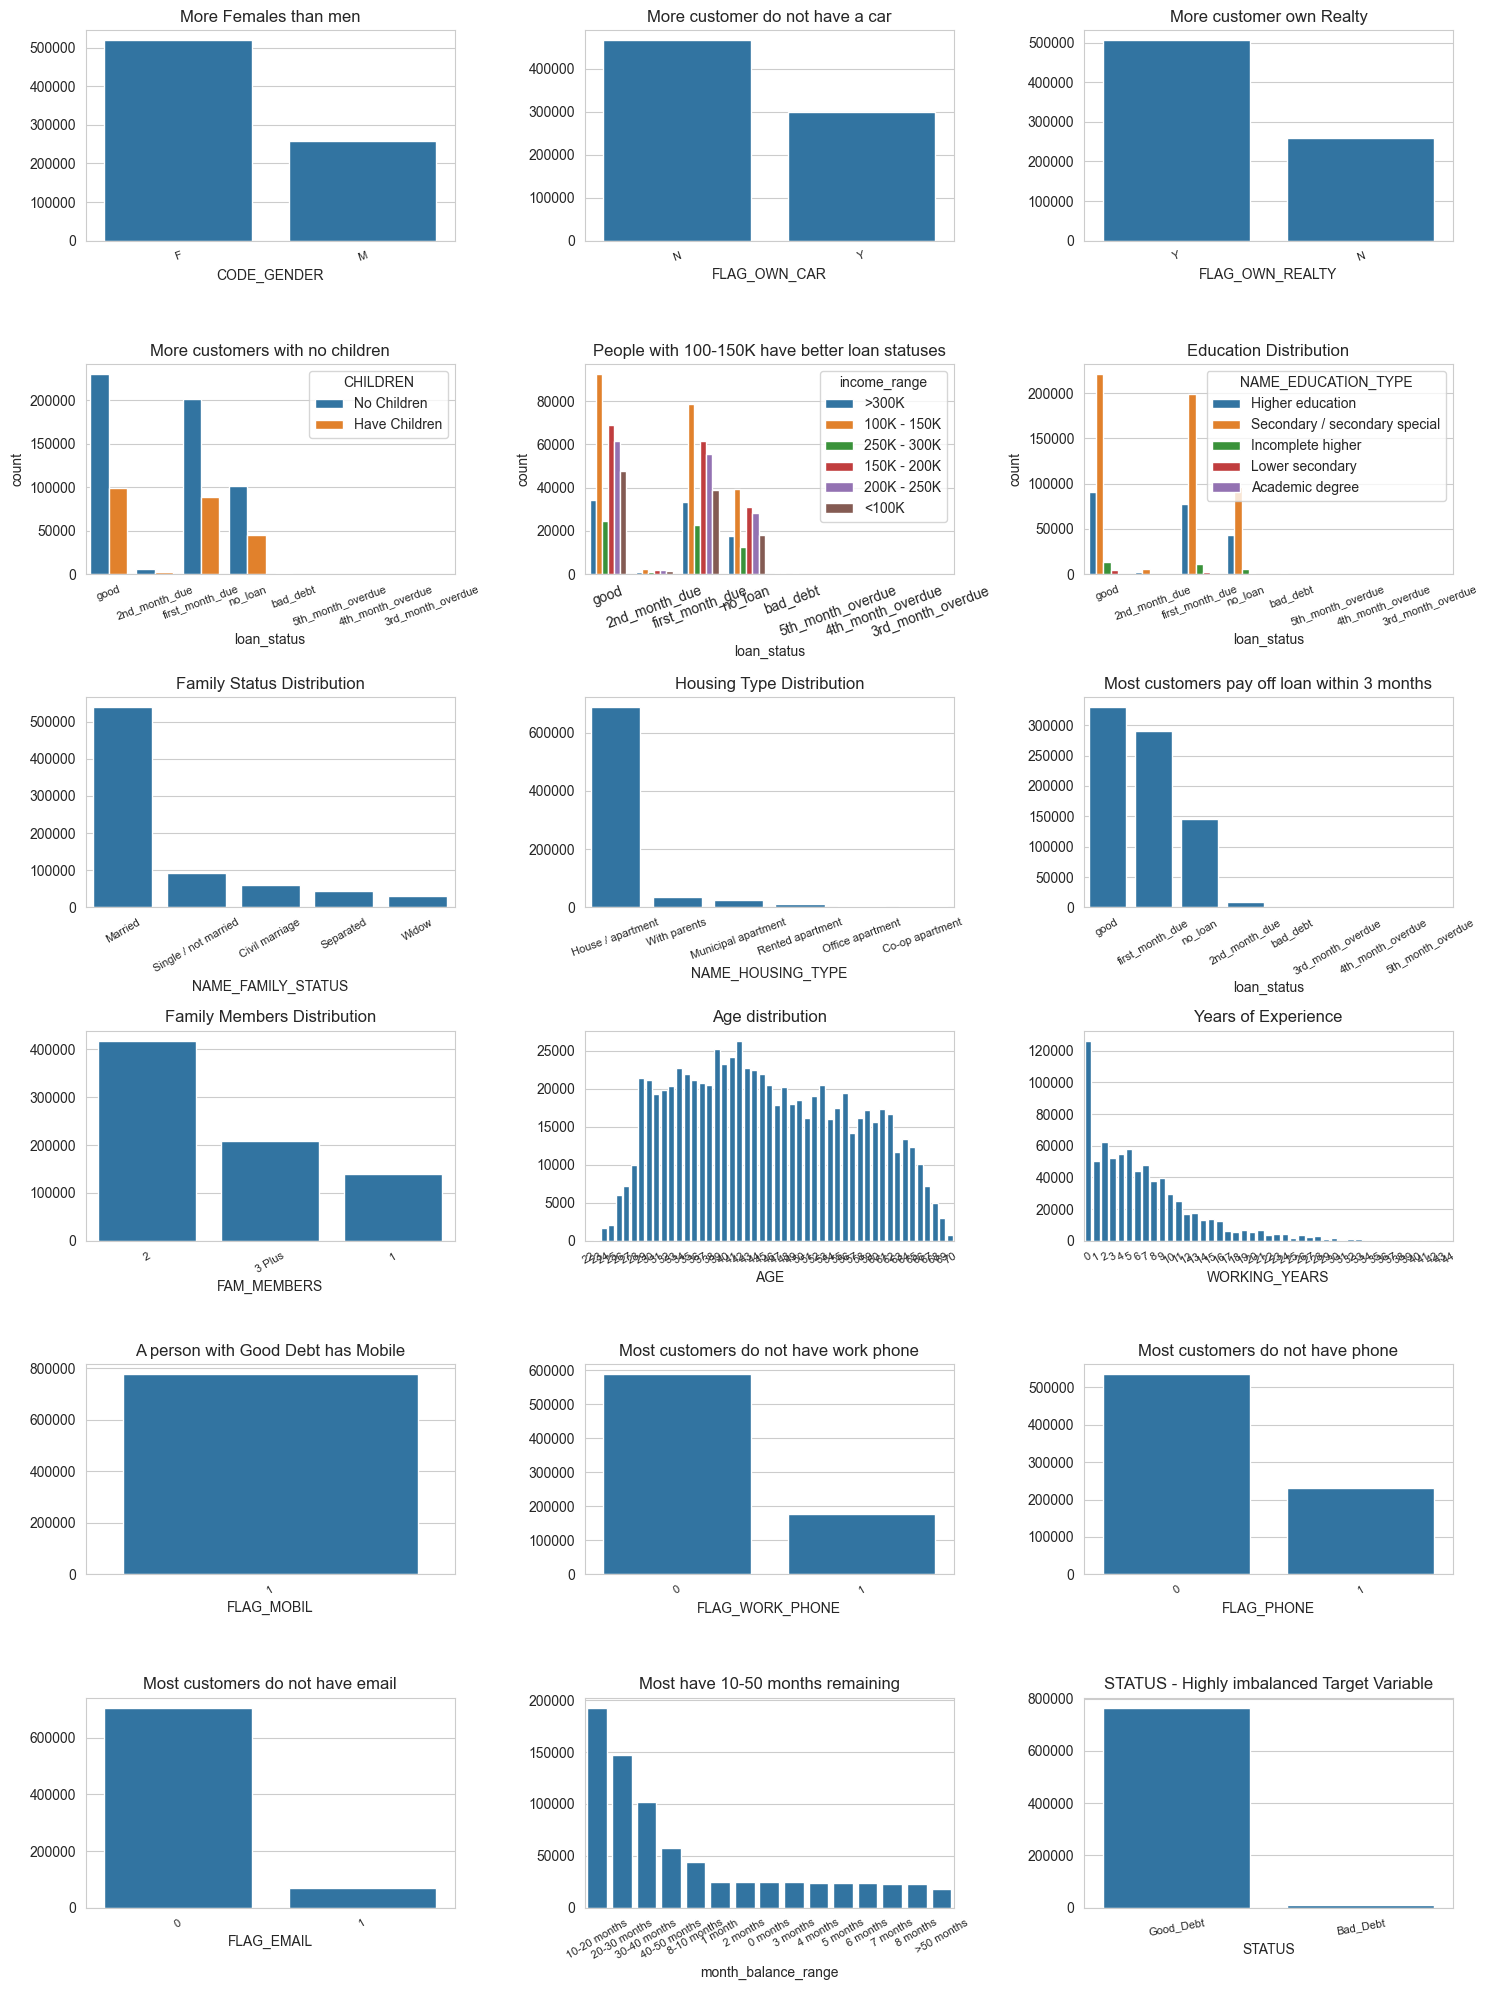

In [23]:
sns.set_style("whitegrid")

# Create subplots
#fig, axes = plt.subplots(9, 2, figsize=(10, 30))
fig, axes = plt.subplots(6, 3, figsize=(15, 20))


df1 = df.loc[(df['STATUS'] == 'Good_Debt')]


# Plot for 'Gender' column
value_counts = df['CODE_GENDER'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values,ax=axes[0, 0])
axes[0, 0].set_title('More Females than men')
axes[0, 0].tick_params(axis='x', labelrotation=20,labelsize=8)

# Plot for 'Own Car' column
value_counts = df1['FLAG_OWN_CAR'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[0, 1])
axes[0, 1].set_title('More customer do not have a car')
axes[0, 1].tick_params(axis='x', labelrotation=20,labelsize=8)


# Plot for 'Own Realty' column
value_counts = df1['FLAG_OWN_REALTY'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[0, 2])
axes[0, 2].set_title('More customer own Realty')
axes[0, 2].tick_params(axis='x', labelrotation=20,labelsize=8)


# Plot for 'No. of Children Distribution' column
value_counts = df1['CHILDREN'].value_counts()
#sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1, 0])
sns.countplot(data=df, x=df['loan_status'], hue=df['CHILDREN'],ax=axes[1, 0])
axes[1, 0].set_title('More customers with no children')
axes[1, 0].tick_params(axis='x', labelrotation=20,labelsize=8)
#for index, value in enumerate(value_counts.values):
#    axes[1, 1].text(index, value + 0.5, str(round(value,1)), ha='center', va='bottom')
   
# Plot for 'Income range' column
value_counts = df1['income_range'].value_counts()
#sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1, 1])
sns.countplot(data=df, x=df['loan_status'], hue=df['income_range'],ax=axes[1, 1])
axes[1, 1].set_title('People with 100-150K have better loan statuses')
axes[1, 1].tick_params(axis='x', labelrotation=20)
   
# Plot for 'Income Type' column
value_counts = df1['NAME_EDUCATION_TYPE'].value_counts()
highest_values = value_counts.nlargest(8)
#sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[1, 2])
sns.countplot(data=df, x=df['loan_status'], hue=df['NAME_EDUCATION_TYPE'],ax=axes[1, 2])
axes[1, 2].set_title('Education Distribution')
axes[1, 2].tick_params(axis='x', labelrotation=20,labelsize=8)
   
# Plot for 'Education' column
value_counts = df1['NAME_FAMILY_STATUS'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[2, 0])
axes[2, 0].set_title('Family Status Distribution')
axes[2, 0].tick_params(axis='x', labelrotation=30,labelsize=8)
   
   
# Plot for 'Family status' column
value_counts = df1['NAME_HOUSING_TYPE'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[2, 1])
axes[2, 1].set_title('Housing Type Distribution')
axes[2, 1].tick_params(axis='x', labelrotation=20,labelsize=8)

# Plot for 'Loan Status' column
value_counts = df['loan_status'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[2, 2])
axes[2, 2].set_title('Most customers pay off loan within 3 months')
axes[2, 2].tick_params(axis='x', labelrotation=30,labelsize=8)

# Plot for 'Family Members' column
value_counts = df1['FAM_MEMBERS'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[3, 0])
axes[3, 0].set_title('Family Members Distribution')
axes[3, 0].tick_params(axis='x', labelrotation=30,labelsize=8)

# Plot for 'Age' column
value_counts = df1['AGE'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[3, 1])
axes[3, 1].set_title('Age distribution')
axes[3, 1].tick_params(axis='x', labelrotation=30,labelsize=8)

# Plot for 'Years of Experience' column
value_counts = df1['WORKING_YEARS'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[3, 2])
axes[3, 2].set_title('Years of Experience')
axes[3, 2].tick_params(axis='x', labelrotation=30,labelsize=8)

# Plot for 'FLAG_MOBIL' column
value_counts = df['FLAG_MOBIL'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[4, 0])
axes[4, 0].set_title('A person with Good Debt has Mobile')
axes[4, 0].tick_params(axis='x', labelrotation=30,labelsize=8)

# Plot for 'FLAG_WORK_PHONE' column
value_counts = df1['FLAG_WORK_PHONE'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[4, 1])
axes[4, 1].set_title('Most customers do not have work phone')
axes[4, 1].tick_params(axis='x', labelrotation=30,labelsize=8)

# Plot for 'FLAG_PHONE' column
value_counts = df1['FLAG_PHONE'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[4, 2])
axes[4, 2].set_title('Most customers do not have phone')
axes[4, 2].tick_params(axis='x', labelrotation=30,labelsize=8)

# Plot for 'FLAG_EMAIL' column
value_counts = df['FLAG_EMAIL'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[5, 0])
axes[5, 0].set_title('Most customers do not have email')
axes[5, 0].tick_params(axis='x', labelrotation=30,labelsize=8)

# Plot for '' column
value_counts = df['month_balance_range'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[5, 1])
axes[5, 1].set_title('Most have 10-50 months remaining')
axes[5, 1].tick_params(axis='x', labelrotation=30,labelsize=8)

# Plot for 'STATUS' column
value_counts = df['STATUS'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[5, 2])
axes[5, 2].set_title('STATUS - Highly imbalanced Target Variable')
axes[5, 2].tick_params(axis='x', labelrotation=30,labelsize=8)

# Adjust layout
plt.tight_layout()
plt.xticks(rotation=10)
plt.xticks(fontsize=8)


# Show the plots
plt.show()

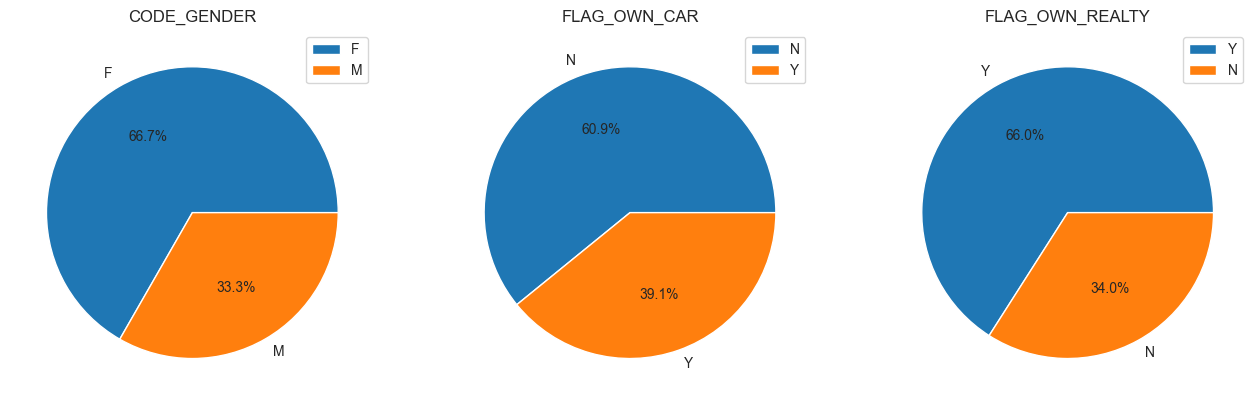

In [24]:
# Define the list of column names
columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

# Create subplots for each column
plt.figure(figsize=(16 , 9))  # Adjust the figure size as needed

for i in range(len(columns)):
    plt.subplot(1, 3, i+1)
    plt.title(columns[i])  # Use the column name as the title
    
    # Plot pie chart
    counts = df[columns[i]].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%'  )
    
    # Add legend with unique values
    plt.legend(counts.index)
plt.show()


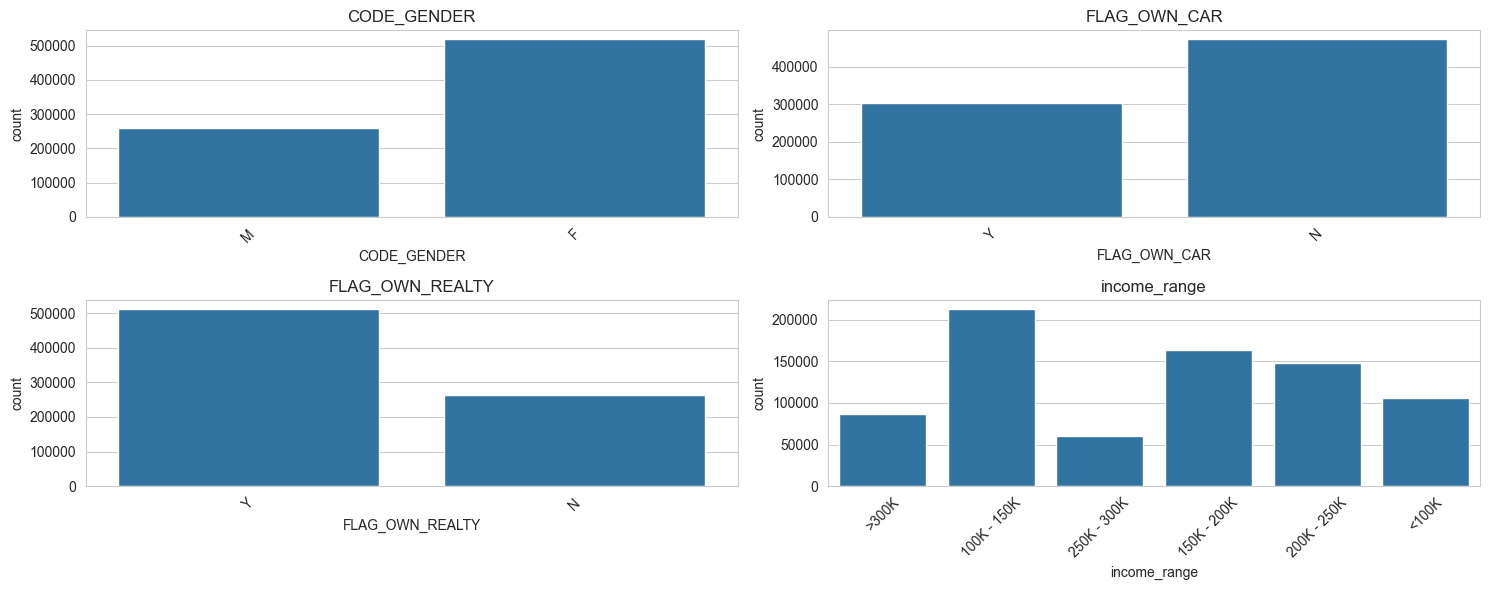

In [25]:
# creating list of specific columns
col = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'income_range']

# defining the figure size
plt.figure(figsize=(15, 6))

# plotting the countplot using for loop
for i in range(len(col)):
    # defining the subplot
    plt.subplot(2, 2, i+1)
    # adding title
    plt.title(col[i])
    # plotting the countplot
    sns.countplot(data=df, x=df[col[i]])
    # rotating the x-axis labels
    plt.xticks(rotation=45)
# layout adjustment
plt.tight_layout()
plt.show()

### Observation:
- There are more Female clients in our dataframe than the male clients
- The number of clients who don't have car is more than the number of clients who have car
- More number of clients have their own property
- Most of the clients in our dataset have paid off their loan for that month
- 
first month loan due and no loan for the month comes at 2nd and 3rd place respectively in terms of value count
- As our dataset has more number of females than males so the count of female is larger than the count of males who have paid off their loan for that month and have no loan for the month
- 
Moreover, the females have more over due and bad debt than male
sbt


## Data Pre-processing and Data Clean up

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          777715 non-null  object 
 1   FLAG_OWN_CAR         777715 non-null  object 
 2   FLAG_OWN_REALTY      777715 non-null  object 
 3   CNT_CHILDREN         777715 non-null  int64  
 4   AMT_INCOME_TOTAL     777715 non-null  float64
 5   NAME_INCOME_TYPE     777715 non-null  object 
 6   NAME_EDUCATION_TYPE  777715 non-null  object 
 7   NAME_FAMILY_STATUS   777715 non-null  object 
 8   NAME_HOUSING_TYPE    777715 non-null  object 
 9   FLAG_MOBIL           777715 non-null  int64  
 10  FLAG_WORK_PHONE      777715 non-null  int64  
 11  FLAG_PHONE           777715 non-null  int64  
 12  FLAG_EMAIL           777715 non-null  int64  
 13  CNT_FAM_MEMBERS      777715 non-null  float64
 14  STATUS               777715 non-null  object 
 15  CHILDREN         

In [27]:
df_backup = df.copy()

In [28]:
# Columns to binarize
columns_to_binarize = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CHILDREN','STATUS']

label_encoders = {}

# Iterate over columns and perform label encoding
for col in columns_to_binarize:
    label_encoders[col] = LabelBinarizer()
    df_backup[col] = label_encoders[col].fit_transform(df_backup[col])

In [29]:
# Identify non-numeric columns
non_numeric_columns = df_backup.select_dtypes(exclude=['number']).columns

# Exclude one column to keep as it is
column_to_keep = 'loan_status'  # Replace with the column name you want to keep as it is
non_numeric_columns = non_numeric_columns[non_numeric_columns != column_to_keep]

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to non-numeric columns
for column in non_numeric_columns:
    df_backup[column] = le.fit_transform(df_backup[column])

In [30]:
df_backup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          777715 non-null  int64  
 1   FLAG_OWN_CAR         777715 non-null  int64  
 2   FLAG_OWN_REALTY      777715 non-null  int64  
 3   CNT_CHILDREN         777715 non-null  int64  
 4   AMT_INCOME_TOTAL     777715 non-null  float64
 5   NAME_INCOME_TYPE     777715 non-null  int64  
 6   NAME_EDUCATION_TYPE  777715 non-null  int64  
 7   NAME_FAMILY_STATUS   777715 non-null  int64  
 8   NAME_HOUSING_TYPE    777715 non-null  int64  
 9   FLAG_MOBIL           777715 non-null  int64  
 10  FLAG_WORK_PHONE      777715 non-null  int64  
 11  FLAG_PHONE           777715 non-null  int64  
 12  FLAG_EMAIL           777715 non-null  int64  
 13  CNT_FAM_MEMBERS      777715 non-null  float64
 14  STATUS               777715 non-null  int64  
 15  CHILDREN         

In [31]:
# Drop 'loan_status' and 'status' columns from col
col = df_backup.drop(['loan_status', 'STATUS'], axis=1) # Assume that col is our independent variable

# Compute variance inflation factor

# Create a dataframe to store the VIF
factor  = pd.DataFrame(columns=["VIF", "Features"] )
# For each column, compute the VIF
factor["Features"] = col.columns
factor["VIF"] = [variance_inflation_factor(col.values, i) for i in range(col.shape[1])]

# Display the results
factor

,VIF,Features
0,1.246295,CODE_GENDER
1,1.221541,FLAG_OWN_CAR
2,1.092500,FLAG_OWN_REALTY
3,106.730594,CNT_CHILDREN
4,1.496176,AMT_INCOME_TOTAL
5,1.126678,NAME_INCOME_TYPE
6,1.109896,NAME_EDUCATION_TYPE
7,4.996593,NAME_FAMILY_STATUS
8,1.073202,NAME_HOUSING_TYPE
9,204.599708,FLAG_MOBIL


Multicollinearity occurs when two or more predictor variables in the model are highly correlated.

Variance Inflation Factor (VIF) is 1.0 for all columns except children, family_status and mobile which are highly correlated with each other.

Hence, we need to drop children , family_status & mobile columns from our independent variable list to get best results.

In [32]:
columns_to_drop = ['CNT_FAM_MEMBERS','CNT_CHILDREN','FLAG_MOBIL','NAME_FAMILY_STATUS','CHILDREN','FAM_MEMBERS','loan_status']

# Drop the columns in one shot
df.drop(columns=columns_to_drop, inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          777715 non-null  object 
 1   FLAG_OWN_CAR         777715 non-null  object 
 2   FLAG_OWN_REALTY      777715 non-null  object 
 3   AMT_INCOME_TOTAL     777715 non-null  float64
 4   NAME_INCOME_TYPE     777715 non-null  object 
 5   NAME_EDUCATION_TYPE  777715 non-null  object 
 6   NAME_HOUSING_TYPE    777715 non-null  object 
 7   FLAG_WORK_PHONE      777715 non-null  int64  
 8   FLAG_PHONE           777715 non-null  int64  
 9   FLAG_EMAIL           777715 non-null  int64  
 10  STATUS               777715 non-null  object 
 11  income_range         777715 non-null  object 
 12  month_balance_range  777715 non-null  object 
 13  AGE                  777715 non-null  int32  
 14  WORKING_YEARS        777715 non-null  int64  
dtypes: float64(1), in

In [34]:
# Columns to binarize
columns_to_binarize = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','STATUS']

label_encoders = {}

# Iterate over columns and perform label encoding
for col in columns_to_binarize:
    label_encoders[col] = LabelBinarizer()
    df[col] = label_encoders[col].fit_transform(df[col])

In [35]:
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Exclude one column to keep as it is
column_to_keep = 'loan_status'  # Replace with the column name you want to keep as it is
non_numeric_columns = non_numeric_columns[non_numeric_columns != column_to_keep]

# Apply one-hot encoding to remaining non-numeric columns
df = pd.get_dummies(df, columns=non_numeric_columns,  dtype=int)

## Feature selection

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 47 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   CODE_GENDER                                        777715 non-null  int64  
 1   FLAG_OWN_CAR                                       777715 non-null  int64  
 2   FLAG_OWN_REALTY                                    777715 non-null  int64  
 3   AMT_INCOME_TOTAL                                   777715 non-null  float64
 4   FLAG_WORK_PHONE                                    777715 non-null  int64  
 5   FLAG_PHONE                                         777715 non-null  int64  
 6   FLAG_EMAIL                                         777715 non-null  int64  
 7   STATUS                                             777715 non-null  int64  
 8   AGE                                                777715 non-null  int32 

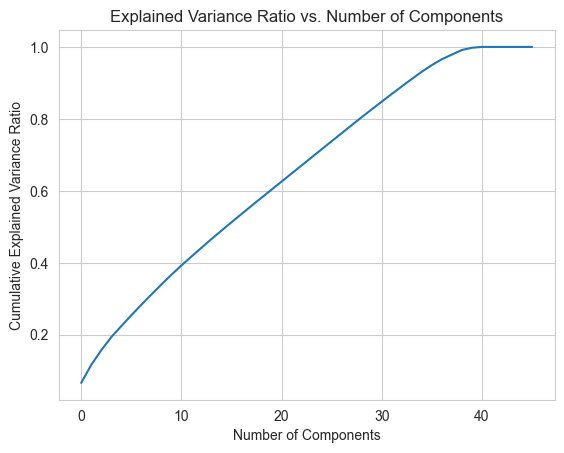

In [37]:
X = df.drop('STATUS', axis=1)  # Drop the target column to get features
y = df['STATUS']  # Assign the target column to y

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)  # Fit PCA on your data
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()

#### Principal Component Analysis shows 35 features show 95% of cumulative explained variance

## Arriving at hyper parameters for Classifiers
#### Using subset of data to arrive at hypertuned parameters before true comparisonayes



I have compared the following models:
- Logistic Regression
- Decision Trees
- K-Nearest Neighbors 
- Support Vector Classifiers
- Neural Network model
- Random Forest model
- Naive Bayes

In addition to above models, I have also set Ensemble Voting Classier to see if the score is better.


## Comparing different Classifiers

In [38]:
df_reduced = df.sample(frac=0.1, random_state=42)

In [39]:
df_reduced.shape

(77772, 47)

In [40]:
X = df_reduced.drop('STATUS', axis=1)  # Drop the target column to get features
y = df_reduced['STATUS']  # Assign the target column to y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
param_grids = {
    'Logistic Regression': {
        'model__C': [0.001, 0.01, 0.1, 1],
        'model__solver': ['liblinear', 'lbfgs','saga']

    },
    'KNeighbors Classifier': {
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance']
    },
    'DecisionTree Classifier': {
        'model__criterion': ['gini', 'entropy'],
        'model__max_depth': [None, 10, 20, 30]
    },
    'Naive Bayes Classifier':{
        'model__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]

    }
}

pipelines = {
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=35)),
        ('model', LogisticRegression(max_iter=10000))
    ]),
    "KNeighbors Classifier": Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=35)),
        ('model', KNeighborsClassifier())
    ]),
    "DecisionTree Classifier": Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=35)),
        ('model', DecisionTreeClassifier(random_state=42))
    ]),
    "Naive Bayes Classifier": Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=35)),
        ('model', GaussianNB())
    ])
}

# Perform grid search for each pipeline
best_estimators = {}
best_params = {}
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    best_params[name] = str(grid_search.best_params_)
    print(f"Best parameters for {name}: {grid_search.best_params_}")

Best parameters for Logistic Regression: {'model__C': 0.001, 'model__solver': 'saga'}
Best parameters for KNeighbors Classifier: {'model__n_neighbors': 9, 'model__weights': 'distance'}
Best parameters for DecisionTree Classifier: {'model__criterion': 'entropy', 'model__max_depth': None}
Best parameters for Naive Bayes Classifier: {'model__var_smoothing': 1e-05}


In [42]:
df_reduced = df.sample(frac=0.05, random_state=42)
X = df_reduced.drop('STATUS', axis=1)  # Drop the target column to get features
y = df_reduced['STATUS']  # Assign the target column to y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
param_grids = {
    'SVC': {
        'model__C': [0.001,0.01,0.1],
        'model__gamma': [0.001,0.01],
        'model__kernel': ['linear', 'poly', 'rbf']
    },
    'MLP Classifier': {
        'model__hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'model__activation': ['logistic'],
        'model__solver': ['sgd'],
        'model__alpha': [0.0001, 0.05],
        'model__max_iter': [200],
        'model__learning_rate': ['constant', 'adaptive']
    },
    'RandomForest Classifier':{
        'model__n_estimators': [50, 100, 150],      # Example: List of discrete values
        'model__max_depth': [None, 10, 20, 30],      # Maximum depth of the tree
        'model__min_samples_split': [10],      # Minimum number of samples required to split an internal node
        'model__min_samples_leaf': [1],        # Minimum number of samples required to be at a leaf node
        'model__bootstrap': [False]            # Whether bootstrap samples are used when building trees
    }
}

pipelines = {
    "MLP Classifier": Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=35)),
        ('model', MLPClassifier(random_state=42))
    ]),
    "RandomForest Classifier": Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=35)),
        ('model', RandomForestClassifier(random_state=42))
    ]),
    "SVC": Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=35)),
        ('model', SVC(probability=True))
    ])
}

# Perform grid search for each pipeline
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    best_params[name] = str(grid_search.best_params_)
    print(f"Best parameters for {name}: {grid_search.best_params_}")

Best parameters for MLP Classifier: {'model__activation': 'logistic', 'model__alpha': 0.0001, 'model__hidden_layer_sizes': (100,), 'model__learning_rate': 'adaptive', 'model__max_iter': 200, 'model__solver': 'sgd'}
Best parameters for RandomForest Classifier: {'model__bootstrap': False, 'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 150}
Best parameters for SVC: {'model__C': 0.001, 'model__gamma': 0.01, 'model__kernel': 'poly'}


In [44]:
df_answer1 = pd.DataFrame(columns=['Method', 'Parameters', 'Train Time', 'Train Accuracy','Test Accuracy','ROC_AUC','Average Precision'])
pd.set_option('display.max_colwidth', 100)  # Adjust the width as needed

In [45]:
X = df.drop('STATUS', axis=1)  # Drop the target column to get features
y = df['STATUS']  # Assign the target column to y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
y_pred_proba = {}
fitted_importances = {}
for name, estimator in best_estimators.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),   # Step 1: Scale the data
        ('pca', PCA(n_components=35)),   # Step 2: PCA with 2 components
        ('model', estimator)  # Step 3: Model with specified parameters
    ])

    start_time = time.time()
    with parallel_backend('threading', n_jobs=-1):
        pipeline.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time  

    train_accuracy = pipeline.score(X_train, y_train)
    test_accuracy = pipeline.score(X_test, y_test)

    y_pred = pipeline.predict(X_test)
    model_probabilities = pipeline.predict_proba(X_test)[:, 1]
    y_pred_proba[name] = model_probabilities

    model_roc_auc = round(roc_auc_score(y_test, model_probabilities, multi_class='ovr'),3)
    model_avg_precision = round(average_precision_score(y_test, model_probabilities),3)

    next_index = len(df_answer1)
    df_answer1.loc[next_index] = [name,best_params[name], training_time, train_accuracy,test_accuracy,model_roc_auc,model_avg_precision]
    print(name,",",best_params[name],",",training_time,",",train_accuracy,",",test_accuracy,",",model_roc_auc,",",model_avg_precision)

Logistic Regression , {'model__C': 0.001, 'model__solver': 'saga'} , 7.089722633361816 , 0.9850684376667546 , 0.9853095285548048 , 0.573 , 0.988
KNeighbors Classifier , {'model__n_neighbors': 9, 'model__weights': 'distance'} , 1.2157814502716064 , 0.9873459429225359 , 0.9842230122859916 , 0.726 , 0.992
DecisionTree Classifier , {'model__criterion': 'entropy', 'model__max_depth': None} , 35.38234567642212 , 0.9874359501874079 , 0.9829564814874343 , 0.766 , 0.993
Naive Bayes Classifier , {'model__var_smoothing': 1e-05} , 1.5079057216644287 , 0.978785609124165 , 0.9790797400075864 , 0.549 , 0.987
MLP Classifier , {'model__activation': 'logistic', 'model__alpha': 0.0001, 'model__hidden_layer_sizes': (100,), 'model__learning_rate': 'adaptive', 'model__max_iter': 200, 'model__solver': 'sgd'} , 340.40394258499146 , 0.9850684376667546 , 0.9853095285548048 , 0.572 , 0.988
RandomForest Classifier , {'model__bootstrap': False, 'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_sa

In [ ]:
# Combine models using VotingRegressor
#voting_clf = VotingClassifier(
#    estimators=[
#    ('lr', best_estimators['Logistic Regression']),
#    ('knn', best_estimators['KNeighbors Classifier']),
#    ('dt', best_estimators['DecisionTree Classifier']),
#    ('nb', best_estimators['Naive Bayes Classifier']),
#    ('mlp', best_estimators['MLP Classifier']),
#    ('rf', best_estimators['RandomForest Classifier']),            
#    ('svc', best_estimators['SVC'])
#    ],
#    voting='soft')

# Train the ensemble model
#start_time = time.time()
#with parallel_backend('threading', n_jobs=-1):
#    voting_clf.fit(X_train, y_train)
#end_time = time.time()
#training_time = end_time - start_time

#train_accuracy = voting_clf.score(X_train, y_train)
#test_accuracy = voting_clf.score(X_test, y_test)

#y_pred = voting_clf.predict(X_test)
#model_probabilities = voting_clf.predict_proba(X_test)[:, 1]
#model_roc_auc = round(roc_auc_score(y_test, model_probabilities, multi_class='ovr'),3)
#model_avg_precision = round(average_precision_score(y_test, model_probabilities),3)


#next_index = len(df_answer1)
#df_answer1.loc[next_index] = ["Voting Classifier","", training_time, train_accuracy,test_accuracy,model_roc_auc,model_avg_precision]
#print(name,",",best_params[name],",",training_time,",",train_accuracy,",",test_accuracy,",",model_roc_auc,",",model_avg_precision)


In [47]:
X = df.drop('STATUS', axis=1)  # Drop the target column to get features
y = df['STATUS']  # Assign the target column to y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline with scaling and DummyClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dummy', DummyClassifier(strategy='stratified'))  # Other strategies: 'most_frequent', 'prior', 'uniform', 'constant'
])

# Fit the dummy classifier
start_time = time.time()
with parallel_backend('threading', n_jobs=-1):
    pipeline.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Predict probabilities on the test set
train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)

y_pred = pipeline.predict(X_test)
model_probabilities = pipeline.predict_proba(X_test)[:, 1]
model_roc_auc = round(roc_auc_score(y_test, model_probabilities, multi_class='ovr'),3)
model_avg_precision = round(average_precision_score(y_test, model_probabilities),3)

df_answer1.loc[next_index] = ["Dummy Classifier","", training_time, train_accuracy,test_accuracy,model_roc_auc,model_avg_precision]
print("Dummy Classifier,","",",",training_time,",",train_accuracy,",",test_accuracy,",",model_roc_auc,",",model_avg_precision)

Dummy Classifier,  , 0.5538935661315918 , 0.9704904753026494 , 0.9707797843683097 , 0.498 , 0.985


In [48]:
df_answer1 = df_answer1.sort_values(by='ROC_AUC', ascending=False)
df_answer1

,Method,Parameters,Train Time,Train Accuracy,Test Accuracy,ROC_AUC,Average Precision
5,RandomForest Classifier,"{'model__bootstrap': False, 'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_...",183.275120,0.987434,0.985065,0.813,0.995
2,DecisionTree Classifier,"{'model__criterion': 'entropy', 'model__max_depth': None}",35.382346,0.987436,0.982956,0.766,0.993
1,KNeighbors Classifier,"{'model__n_neighbors': 9, 'model__weights': 'distance'}",1.215781,0.987346,0.984223,0.726,0.992
0,Logistic Regression,"{'model__C': 0.001, 'model__solver': 'saga'}",7.089723,0.985068,0.985310,0.573,0.988
4,MLP Classifier,"{'model__activation': 'logistic', 'model__alpha': 0.0001, 'model__hidden_layer_sizes': (100,), '...",340.403943,0.985068,0.985310,0.572,0.988
3,Naive Bayes Classifier,{'model__var_smoothing': 1e-05},1.507906,0.978786,0.979080,0.549,0.987
6,Dummy Classifier,,0.553894,0.970490,0.970780,0.498,0.985


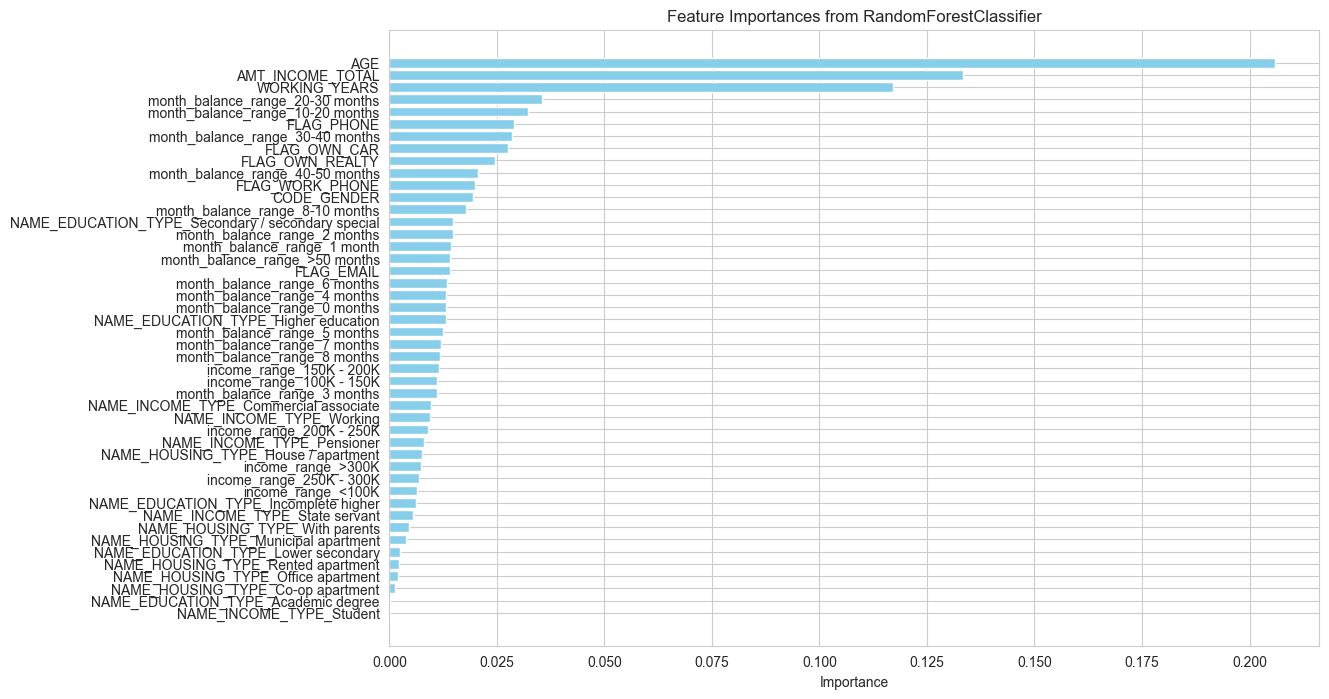

In [49]:
# Define a pipeline with StandardScaler and RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(bootstrap = False, max_depth = None, min_samples_leaf = 1, min_samples_split = 10, n_estimators= 50, random_state=42))
])

# Fit the pipeline to the training data
with parallel_backend('threading', n_jobs=-1):
    pipeline.fit(X_train, y_train)


# Get the classifier from the pipeline
classifier = pipeline.named_steps['classifier']

# Get feature importances
importances = classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from RandomForestClassifier')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()




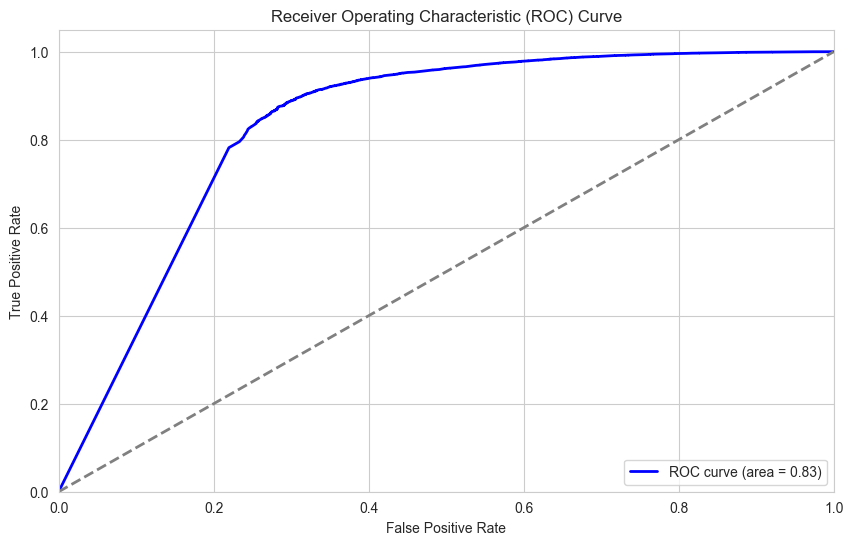

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the test set
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Curve Shape:

Rises Quickly: The curve rises quickly towards the top-left corner, indicating that the classifier is good at distinguishing between the positive and negative classes.
High TPR, Low FPR: A higher TPR with a lower FPR means the classifier correctly identifies most of the positive instances while minimizing false positives.

### ROC AUC Score:

Value: The ROC AUC score, displayed in the legend (e.g., area = 0.82), is close enough to 1.0. This indicates good model performance.
Interpretation: An ROC AUC score of 0.82 means that there is a 82% chance that the classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one.